In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


 # **Anti-Money Laundering (AML)** 

#    Let's begin by understanding the variables in the dataset and their meanings:
   - `Timestamp`: The timestamp of the transaction
   - `From Bank	`: The sending bank account
   - `To Account.1`: The receiving bank account
   - `Amount Received`: The amount received in the transaction
   - `Receiving Currency`: The currency of the received amount
   - `Amount Paid`: The amount paid in the transaction
   - `Payment Currency`: The currency of the paid amount
   - `Payment Format`: The format of the payment (e.g., Reinvestment, Cheque)
   - `Is Laundering`: A binary indicator for whether the transaction is classified as money laundering (0 or 1)


In [2]:
df = pd.read_csv('./HI-Small_Trans.csv')
df.head(5)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [3]:
df.shape

(5078345, 11)

# Performing EDA in 4 phases:
- Data Understanding: The data is pretty much straightforward to understand.
- Data Cleaning
- Exploratory Analysis
- Feature Engineering

We are already in phase 2, let's perform data cleaning/pre-processing
Data Cleaning further divided in 5 phases: 
1. Handling Missing Values
2. Removing Duplicates
3. Handling Inconsistencies
4. Handling Outliers
5. Handling Dates and Times:


In [4]:
df.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [5]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

'''Removing leading and trailing spaces'''
df['Payment Format'] = df['Payment Format'].str.strip()

In [7]:
'''Handling Outliers'''
outliers_upper_bound = df['Amount Received'].quantile(0.75)
outliers_lower_bound = df['Amount Received'].quantile(0.25)

In [8]:
outliers_lower_bound_df = df.loc[df['Amount Received'] < outliers_lower_bound]
outliers_upper_bound_df = df.loc[df['Amount Received'] > outliers_upper_bound]

In [9]:
'''Convert to Dates and Times'''
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0         2022-09-01 00:20:00
1         2022-09-01 00:20:00
2         2022-09-01 00:00:00
3         2022-09-01 00:02:00
4         2022-09-01 00:06:00
                  ...        
5078340   2022-09-10 23:57:00
5078341   2022-09-10 23:35:00
5078342   2022-09-10 23:52:00
5078343   2022-09-10 23:46:00
5078344   2022-09-10 23:37:00
Name: Timestamp, Length: 5078336, dtype: datetime64[ns]

In [10]:
df['Hour'] = df['Timestamp'].dt.hour
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0,0


In [11]:
df.sample(5)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour
317159,2022-09-01 00:07:00,148785,8127D3E10,148785,8127D3E10,5.959000e+01,Saudi Riyal,59.59,Saudi Riyal,Reinvestment,0,0
2847287,2022-09-06 03:20:00,1,800B0E670,1,800B0E670,1.833519e+09,Yen,17395817.44,US Dollar,ACH,0,3
4610823,2022-09-09 14:25:00,8888,807BAB2D0,27241,811CAC7A0,5.286300e+02,Euro,528.63,Euro,Credit Card,0,14
1079993,2022-09-01 22:41:00,240243,80FB16370,240243,80FB16370,7.094595e+05,Swiss Franc,709459.51,Swiss Franc,Reinvestment,0,22
5059641,2022-09-10 21:45:00,26698,80BF5A060,238744,80E312310,1.770000e+00,US Dollar,1.77,US Dollar,Wire,0,21


Mathematical overview of the data 

In [12]:
df.describe()

,Timestamp,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering,Hour
count,5078336,5.078336e+06,5.078336e+06,5.078336e+06,5.078336e+06,5.078336e+06,5.078336e+06
mean,2022-09-05 07:16:07.855403520,4.573058e+04,6.574461e+04,5.988737e+06,4.509281e+06,1.019428e-03,1.049245e+01
min,2022-09-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00
25%,2022-09-02 04:32:00,1.190000e+02,4.259000e+03,1.833700e+02,1.844800e+02,0.000000e+00,4.000000e+00
50%,2022-09-05 12:16:00,9.679000e+03,2.156800e+04,1.411040e+03,1.414570e+03,0.000000e+00,1.000000e+01
75%,2022-09-08 03:13:00,2.862800e+04,1.223320e+05,1.234630e+04,1.229815e+04,0.000000e+00,1.700000e+01
max,2022-09-18 16:18:00,3.563030e+05,3.562940e+05,1.046302e+12,1.046302e+12,1.000000e+00,2.300000e+01
std,NaN,8.176567e+04,8.409303e+04,1.037184e+09,8.697736e+08,3.191221e-02,7.362642e+00


Let's try to observe the suspicious patterns by plucking fraudulent records of launderers

In [13]:
illicit_funds = df[df['Is Laundering']==1]
illicit_funds

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour
4742,2022-09-01 00:21:00,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1,0
40621,2022-09-01 00:03:00,70,100428660,11474,805B716C0,29024.33,US Dollar,29024.33,US Dollar,Credit Card,1,0
69152,2022-09-01 00:01:00,70,100428660,15980,80B39E7B0,792.92,US Dollar,792.92,US Dollar,Credit Card,1,0
85763,2022-09-01 00:03:00,70,100428660,113798,80DC756E0,13171425.53,US Dollar,13171425.53,US Dollar,Cheque,1,0
90684,2022-09-01 00:23:00,70,100428660,32375,80E480620,14288.83,US Dollar,14288.83,US Dollar,Cash,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5071168,2022-09-10 23:29:00,111433,8065C2380,21550,8065C69E0,7773.42,US Dollar,7773.42,US Dollar,ACH,1,23
5073375,2022-09-10 23:07:00,9,80727F930,219557,8072A28C0,448920.65,Ruble,448920.65,Ruble,Cheque,1,23
5074248,2022-09-12 03:34:00,222,812D127D0,50202,812D129C0,20085.71,Saudi Riyal,20085.71,Saudi Riyal,ACH,1,3
5075056,2022-09-10 23:43:00,17327,8095F6C20,15695,8095F6C70,3314.36,US Dollar,3314.36,US Dollar,ACH,1,23


In [14]:
illicit_funds.sample(5)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour
1944662,2022-09-03 11:23:00,287,8061C8910,19723,803983BE0,1.993069e+07,Yuan,1.993069e+07,Yuan,ACH,1,11
5058339,2022-09-14 14:10:00,28827,806DEA990,41407,80F454910,1.414157e+04,Swiss Franc,1.414157e+04,Swiss Franc,ACH,1,14
1237934,2022-09-05 06:35:00,214615,8075AC7C0,128557,80A937600,1.542640e+08,Australian Dollar,1.542640e+08,Australian Dollar,ACH,1,6
4563222,2022-09-13 11:27:00,214749,805DB7F20,15,80AD14210,2.715244e+04,Australian Dollar,2.715244e+04,Australian Dollar,ACH,1,11
4777034,2022-09-12 13:16:00,17729,80720B3B0,3149,8032FADC0,5.372230e+03,US Dollar,5.372230e+03,US Dollar,ACH,1,13


In [15]:
illicit_funds['Payment Format'].value_counts()

Payment Format
ACH            4483
Cheque          324
Credit Card     206
Cash            108
Bitcoin          56
Name: count, dtype: int64

In [16]:
df['Payment Format'].value_counts() 

Payment Format
Cheque          1864331
Credit Card     1323324
ACH              600793
Cash             490891
Reinvestment     481056
Wire             171855
Bitcoin          146086
Name: count, dtype: int64

In [18]:
df['Payment Currency'].value_counts()

Payment Currency
US Dollar            1895169
Euro                 1168296
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146061
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: count, dtype: int64

*As you can observe in the data above, the highest number of fraud was reported with ACH payment method, the combination of minimal credential requirements, the batch processing system (which results in delays), the ease of use and trust associated with the ACH system, the variety of fraud methods available to criminals, the high volume of transactions, and the lack of immediate detection mechanisms make ACH payments a prime target for money laundering frauds.*


/home/akshat/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


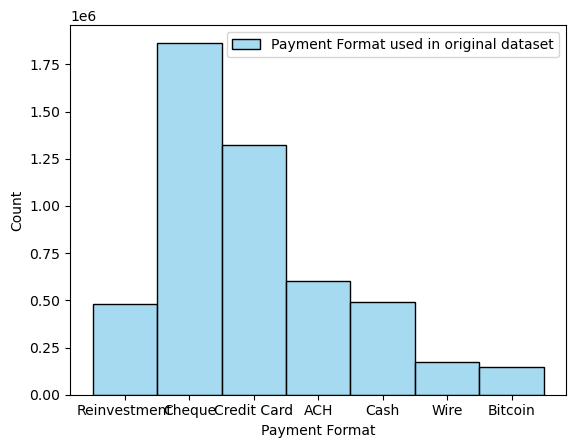

/home/akshat/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


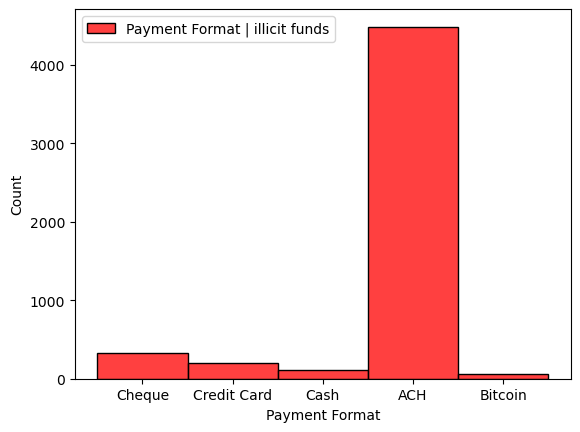

In [17]:
sns.histplot(data=df, x="Payment Format", color="skyblue", label="Payment Format used in original dataset")

plt.legend()
plt.show()

sns.histplot(data=illicit_funds, x="Payment Format", color="red", label="Payment Format | illicit funds")
plt.legend()
plt.show()

What you can infer from this data is, transactions carried out using wire transfers does not usually initiated by fraudsters.
Let's further explore the data of illicit funds and try to draw patterns out of it if there is any.

'As we can by grouping data on the basis of hours that the maximum transactions intiated in afternoon when the volume of transaction is high'






In [36]:
txnsPerHour = illicit_funds.groupby('Hour').size()
txnsPerHour




Hour
0     176
1     152
2     165
3     146
4     154
5     188
6     207
7     195
8     258
9     217
10    234
11    295
12    336
13    292
14    279
15    263
16    311
17    257
18    255
19    231
20    134
21    154
22    128
23    150
dtype: int64

/home/akshat/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/akshat/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/akshat/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/akshat/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='Payment Format', ylabel='Amount Received'>

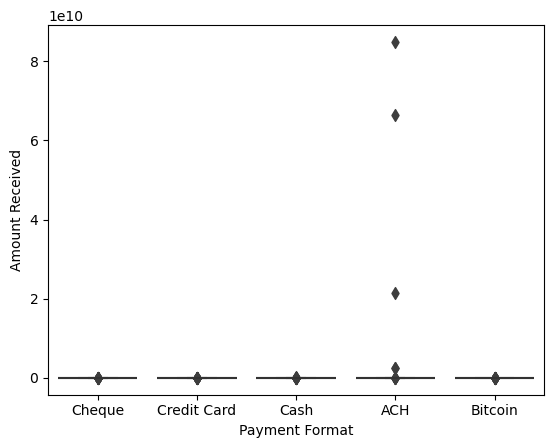

In [43]:
sns.boxenplot(data=illicit_funds, x='Payment Format', y='Amount Received')

*If majority of the Transactions taking place through ACH then let's explore ACH itself as a seperate dataframe*

In [47]:

illicit_funds_ACH = illicit_funds[illicit_funds['Payment Format'] == 'ACH']
illicit_funds_ACH

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour
112579,2022-09-01 00:23:00,231004,812EE86F0,21940,812EE89C0,3401.73,US Dollar,3401.73,US Dollar,ACH,1,0
137520,2022-09-01 00:06:00,21174,800737690,12,80011F990,2848.96,Euro,2848.96,Euro,ACH,1,0
137522,2022-09-01 04:33:00,21174,800737690,20,80020C5B0,8630.40,Euro,8630.40,Euro,ACH,1,4
137524,2022-09-01 09:14:00,21174,800737690,20,80006A5E0,35642.49,Yuan,35642.49,Yuan,ACH,1,9
137525,2022-09-01 09:56:00,21174,800737690,220,8007A5B70,5738987.96,US Dollar,5738987.96,US Dollar,ACH,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
5070832,2022-09-10 23:13:00,12,8016FDD30,1467,8016FDCE0,2049.43,US Dollar,2049.43,US Dollar,ACH,1,23
5071168,2022-09-10 23:29:00,111433,8065C2380,21550,8065C69E0,7773.42,US Dollar,7773.42,US Dollar,ACH,1,23
5074248,2022-09-12 03:34:00,222,812D127D0,50202,812D129C0,20085.71,Saudi Riyal,20085.71,Saudi Riyal,ACH,1,3
5075056,2022-09-10 23:43:00,17327,8095F6C20,15695,8095F6C70,3314.36,US Dollar,3314.36,US Dollar,ACH,1,23


<Axes: xlabel='Receiving Currency'>

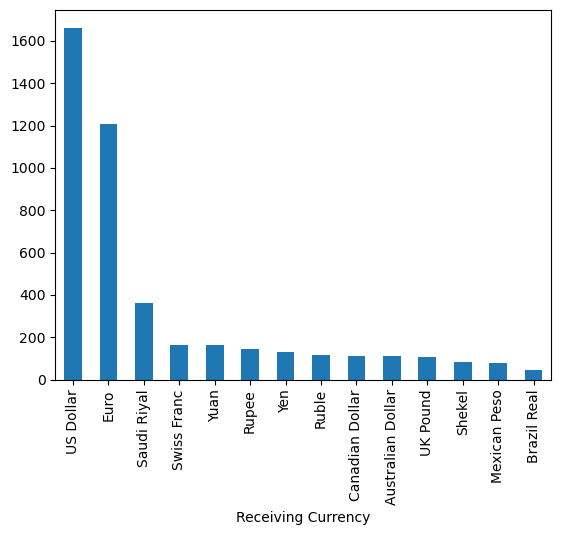

In [52]:
illicit_funds_ACH.groupby('Receiving Currency').size().sort_values(ascending=False).plot.bar()

In [63]:
illicit_funds_ACH['dayName'] = illicit_funds_ACH['Timestamp'].dt.day_name()
illicit_funds_ACH.head(2)

/tmp/ipykernel_7322/4200032567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illicit_funds_ACH['dayName'] = illicit_funds_ACH['Timestamp'].dt.day_name()


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Hour,dayName
112579,2022-09-01 00:23:00,231004,812EE86F0,21940,812EE89C0,3401.73,US Dollar,3401.73,US Dollar,ACH,1,0,Thursday
137520,2022-09-01 00:06:00,21174,800737690,12,80011F990,2848.96,Euro,2848.96,Euro,ACH,1,0,Thursday


<Axes: xlabel='dayName'>

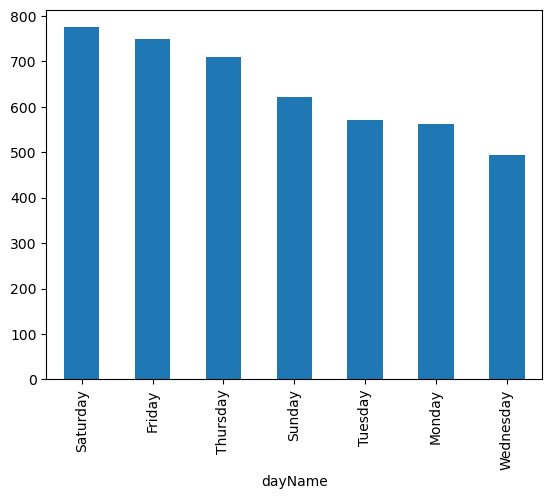

In [82]:
illicit_funds_ACH.groupby('dayName').size().sort_values(ascending=False).plot.bar()


*Now it is safe to say that with payment currency US Dollar, mode ACH and on Saturday laundrers are mostly active*

In [86]:
# Filter for transactions with round number amounts
round_numbers =  illicit_funds_ACH[(illicit_funds_ACH['Amount Received'] % 10000 == 0)]

# Print the filtered transactions
print(round_numbers)

Empty DataFrame
Columns: [Timestamp, From Bank, Account, To Bank, Account.1, Amount Received, Receiving Currency, Amount Paid, Payment Currency, Payment Format, Is Laundering, Hour, dayName]
Index: []


*Late-night or Odd-hour Transactions*

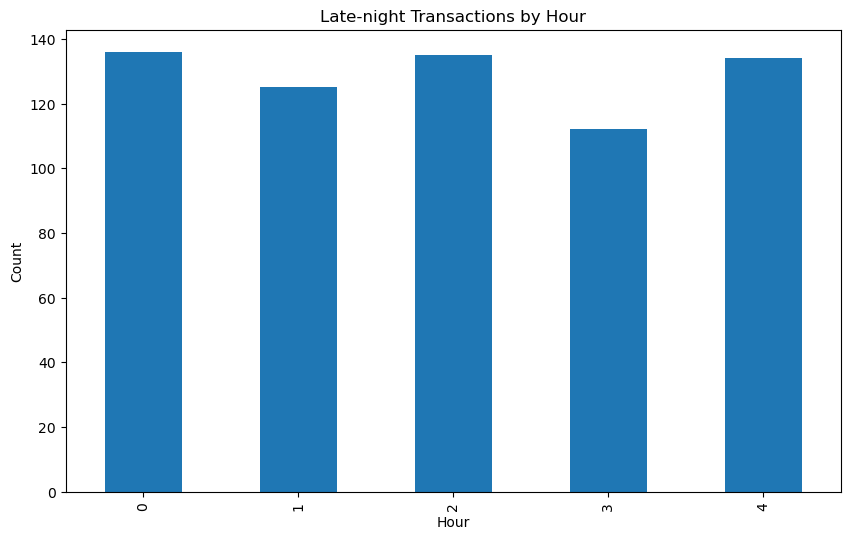

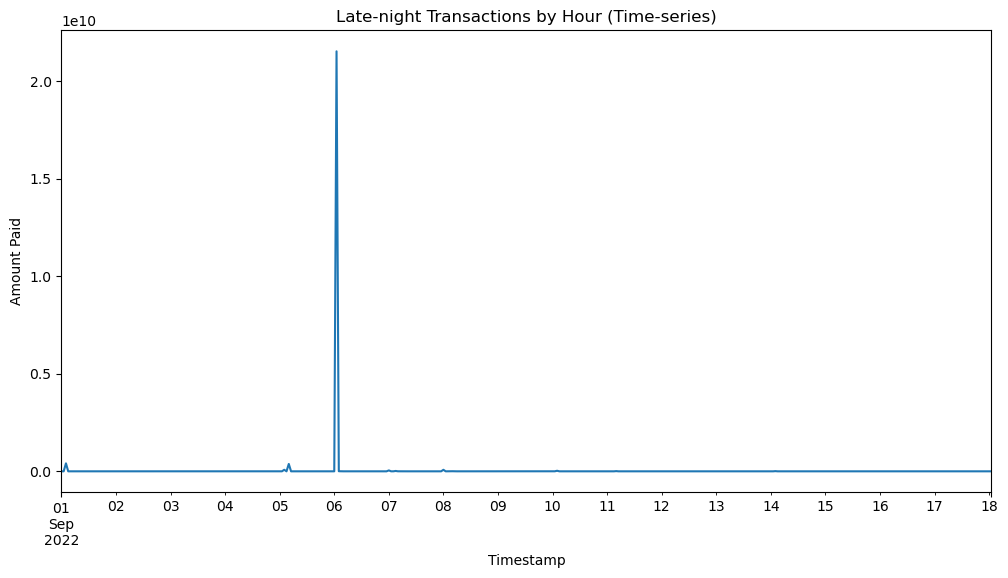

In [91]:
late_night = illicit_funds_ACH[(illicit_funds_ACH['Hour'] >= 0) & (illicit_funds_ACH['Hour'] < 5)]
# Create a bar plot of late-night transactions by hour
late_night['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Late-night Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Create a time-series plot of late-night transactions
late_night.set_index('Timestamp')['Amount Paid'].resample('H').sum().plot(figsize=(12, 6))
plt.title('Late-night Transactions by Hour (Time-series)')
plt.xlabel('Timestamp')
plt.ylabel('Amount Paid')
plt.show()